In [14]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score


In [71]:
# Load the iris dataset
ffile = pd.read_csv("HgDatasetMain2.csv",encoding="unicode_escape")

# Create a list of feature names
feat_labels = ['Sepal Length','Sepal Width','Petal Length','Petal Width']

# Create X from the features
X = ffile.data

# Create y from output
y = ffile.target

FileNotFoundError: [Errno 2] No such file or directory: 'HgDatasetMain2Test.csv'

In [17]:
ffile = pd.read_csv("HgDatasetMain2.csv",encoding="unicode_escape")

## Data Loading

In [44]:
len(ffile)

2979

### Exploring data

In [46]:
pd.set_option("display.max_columns", None)
ffile.head()

,wkt_geom,fid,Reference,Hg_con_PPB,STD,Tissue,Species,Location type,Location name,Country,Latitude,Longitude,altitude (m),Reference_1,Forest type,Sample Size,Determination method,Study period,figure and table,Location type_1,GEM/TGM,RGM,PBM,reference_2,AGB_ha_1,AGB_ha_2,AGB_ha_3,AGB_ha_4,AGB_ha_5,AGB_ha_6,AGB_ha_7,AGB_ha_8,AGB_ha_9,AGB_ha_10,AGB_ha_11,AGB_ha_12,AGB_ha_13,AboveGroundBiomass_1,AboveGroundBiomass_2,AboveGroundBiomass_3,AboveGroundBiomass_4,AboveGroundBiomass_5,AboveGroundBiomass_6,AboveGroundBiomass_7,AboveGroundBiomass_8,AboveGroundBiomass_9,AboveGroundBiomass_10,AboveGroundBiomass_11,AboveGroundBiomass_12,AboveGroundBiomass_13,BrBCEF_1,BrBCEF_2,BrBCEF_3,BrBCEF_4,BrBCEF_5,BrBCEF_6,BrBCEF_7,BrBCEF_8,BrBCEF_9,BrBCEF_10,BrBCEF_11,BrBCEF_12,BrBCEF_13,ConBCEF_1,ConBCEF_2,ConBCEF_3,ConBCEF_4,ConBCEF_5,ConBCEF_6,ConBCEF_7,ConBCEF_8,ConBCEF_9,ConBCEF_10,ConBCEF_11,ConBCEF_12,ConBCEF_13,ConiferShare_1,ConiferShare_2,ConiferShare_3,ConiferShare_4,ConiferShare_5,ConiferShare_6,ConiferShare_7,ConiferShare_8,ConiferShare_9,ConiferShare_10,ConiferShare_11,ConiferShare_12,ConiferShare_13,ConiferShare_1_2,ConiferShare_2_2,ConiferShare_3_2,ConiferShare_4_2,ConiferShare_5_2,ConiferShare_6_2,ConiferShare_7_2,ConiferShare_8_2,ConiferShare_9_2,ConiferShare_10_2,ConiferShare_11_2,ConiferShare_12_2,ConiferShare_13_2,ForestStockChange_1,ForestStockChange_2,ForestStockChange_3,ForestStockChange_4,ForestStockChange_5,ForestStockChange_6,ForestStockChange_7,ForestStockChange_8,ForestStockChange_9,ForestStockChange_10,ForestStockChange_11,ForestStockChange_12,ForestStockChange_13,Forest_carbonstock_1,Forest_carbonstock_2,Forest_carbonstock_3,Forest_carbonstock_4,Forest_carbonstock_5,Forest_carbonstock_6,Forest_carbonstock_7,Forest_carbonstock_8,Forest_carbonstock_9,Forest_carbonstock_10,Forest_carbonstock_11,Forest_carbonstock_12,Forest_carbonstock_13,R_1,R_2,R_3,R_4,R_5,R_6,R_7,R_8,R_9,R_10,R_11,R_12,R_13,Total_Biomass_1,Total_Biomass_2,Total_Biomass_3,Total_Biomass_4,Total_Biomass_5,Total_Biomass_6,Total_Biomass_7,Total_Biomass_8,Total_Biomass_9,Total_Biomass_10,Total_Biomass_11,Total_Biomass_12,Total_Biomass_13,Unc_Area_1,Unc_Area_2,Unc_Area_3,Unc_Area_4,Unc_Area_5,Unc_Area_6,Unc_Area_7,Unc_Area_8,Unc_Area_9,Unc_Area_10,Unc_Area_11,Unc_Area_12,Unc_Area_13,Unc_GS_1,Unc_GS_2,Unc_GS_3,Unc_GS_4,Unc_GS_5,Unc_GS_6,Unc_GS_7,Unc_GS_8,Unc_GS_9,Unc_GS_10,Unc_GS_11,Unc_GS_12,Unc_GS_13,area_1,area_2,area_3,area_4,area_5,area_6,area_7,area_8,area_9,area_10,area_11,area_12,area_13,stock_1,stock_2,stock_3,stock_4,stock_5,stock_6,stock_7,stock_8,stock_9,stock_10,stock_11,stock_12,stock_13,stockperarea_1,stockperarea_2,stockperarea_3,stockperarea_4,stockperarea_5,stockperarea_6,stockperarea_7,stockperarea_8,stockperarea_9,stockperarea_10,stockperarea_11,stockperarea_12,stockperarea_13,time_bnds_1,Land cover/use,SoilQualityData; Nutrient availability,SoilQualityData; Excess salts,SoilQualityData; Workability,SoilQualityData; Toxicity,SoilQualityData; Rooting contitions,SoilQualityData; Oxygen availability to roots,SoilQualityData; Nutrient retention capacity,SoilLandCoverData; barren/very sparsely vegetated land,SoilLandCoverData; grass/scrub/woodland,"SoilLandCoverData; forest land, calibrated to FRA2000 land statistics",SoilLandCoverData; rain-fed cultivated land,"SoilLandCoverData; irrigated cultivated land, according to GMIA 4.0",SoilLandCoverData; total cultivated land,SoilLandCoverData; mapped water bodies,SoilLandCoverData; built-up land (residential and infrastructure),10m_Bioclimatic variables_1,10m_Bioclimatic variables_2,10m_Bioclimatic variables_3,10m_Bioclimatic variables_4,10m_Bioclimatic variables_5,10m_Bioclimatic variables_6,10m_Bioclimatic variables_7,10m_Bioclimatic variables_8,10m_Bioclimatic variables_9,10m_Bioclimatic variables_10,10m_Bioclimatic variables_11,10m_Bioclimatic variables_12,10m_Bioclimatic variables_13,10m_Bioclimatic variables_14,10m_Bioclimatic variables_15,10m_Bioclimatic variables_16,10m_Bioclimatic variables_17,10

In [41]:
# Describe Numerical Data
ffile.describe()

,fid,Hg_con_PPB,Latitude,Longitude,AGB_ha_1,AGB_ha_2,AGB_ha_3,AGB_ha_4,AGB_ha_5,AGB_ha_6,...,Hg_comb_power_ind_2012.0.1degx0.1deg,Hg_comb_res_oth_2012.0.1degx0.1deg,Hg_glass_2012.0.1degx0.1deg,Hg_gold_A_2012.0.1degx0.1deg,Hg_gold_L_2012.0.1degx0.1deg,Hg_Iro_2012.0.1degx0.1deg,Hg_nfe_oth_2012.0.1degx0.1deg,Hg_shipping_2012.0.1degx0.1deg,Hg_tro_2012.0.1degx0.1deg,Hg_waste_2012.0.1degx0.1deg
count,2979.000000,2979.000000,2979.000000,2979.000000,2688.000000,2688.000000,2688.000000,2688.000000,2688.000000,2688.000000,...,2.979000e+03,2.979000e+03,2.979000e+03,2.979000e+03,2.979000e+03,2.979000e+03,2.979000e+03,2.979000e+03,2.979000e+03,2.979000e+03
mean,1491.174555,574.091776,37.380116,9.781748,82.575624,88.145329,89.344133,90.338887,90.289472,91.885138,...,9.054149e-16,1.823804e-16,1.342303e-18,1.456865e-16,1.243358e-17,2.786170e-18,3.384839e-17,1.446193e-18,3.459489e-17,2.044309e-16
std,860.650860,2790.231115,20.901550,73.585873,38.553963,38.566411,38.384669,39.533619,41.804461,44.672119,...,5.265852e-15,8.058174e-16,7.164094e-18,5.832759e-15,2.595819e-16,1.075115e-16,1.285260e-15,8.428379e-18,1.067118e-16,1.727716e-15
min,1.000000,0.000000,-62.083300,-157.997000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,746.500000,13.400000,30.316700,-56.103000,50.018372,57.671387,60.151466,54.543842,51.759861,51.503170,...,0.000000e+00,2.660000e-19,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.280000e-18,0.000000e+00
50%,1491.000000,32.000000,42.884200,11.626300,76.340263,87.172871,87.278282,92.681274,82.688347,82.590553,...,0.000000e+00,5.290000e-18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.520000e-18,8.880000e-19
75%,2236.500000,82.800000,47.533300,85.190300,110.586166,111.247475,115.153317,115.522545,113.594910,115.096352,...,1.330000e-17,6.410000e-17,5.290000e-20,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.310000e-17,8.400000e-18
max,2981.000000,48000.000000,78.949073,145.657000,219.122604,219.120499,196.067642,180.005005,184.511963,187.516403,...,9.370000e-14,9.370000e-15,2.210000e-16,2.770000e-13,9.920000e-15,4.150000e-15,5.590000e-14,1.000000e-16,1.120000e-15,2.600000e-14


In [42]:
# Describe Categorical Data
ffile.describe(include='O')

,wkt_geom,Reference,STD,Tissue,Species,Location type,Location name,Country,altitude (m),Reference_1,Forest type,Sample Size,Determination method,Study period,figure and table,Location type_1,GEM/TGM,RGM,PBM,reference_2
count,2979,2979,2979,2979,2979,2979,2979,2979,2899,2979,2979,2979,2979,2979,2979,2979,2979,2979,2979,2979
unique,541,239,310,49,655,76,641,45,294,259,29,82,113,368,7,81,65,44,16,22
top,Point (7.79999999999999982 47.39999999999999858),Wohlgemuth et al. 2020,/,Leaf,spruce,remote,Holstein,Europe,/,A bottom-up quantification of foliar mercury u...,coniferous,1,/,2018,table,/,/,/,/,/
freq,235,598,1996,586,329,1579,235,620,2174,598,815,903,1577,601,2278,859,2673,2849,2902,2874


In [43]:
# Check Nulls
ffile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2979 entries, 0 to 2978
Columns: 352 entries, wkt_geom to Hg_waste_2012.0.1degx0.1deg
dtypes: float64(324), int64(8), object(20)
memory usage: 8.0+ MB


In [24]:
ffile.isnull().sum()

wkt_geom                          0
fid                               0
Reference                         0
Hg_con_PPB                        0
STD                               0
                                 ..
Hg_Iro_2012.0.1degx0.1deg         0
Hg_nfe_oth_2012.0.1degx0.1deg     0
Hg_shipping_2012.0.1degx0.1deg    0
Hg_tro_2012.0.1degx0.1deg         0
Hg_waste_2012.0.1degx0.1deg       0
Length: 352, dtype: int64

In [25]:
# Lets check the distribution of target variable
ffile['Hg_con_PPB'].value_counts()

30.0     51
20.0     48
40.0     47
60.0     34
2.0      30
         ..
377.0     1
23.4      1
8.7       1
60.4      1
18.9      1
Name: Hg_con_PPB, Length: 932, dtype: int64

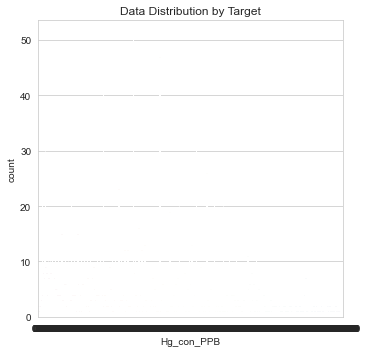

In [27]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.title("Data Distribution by Target")
sns.countplot(x="Hg_con_PPB", data=ffile, palette='Spectral');

## Exploratory Data Visualisation

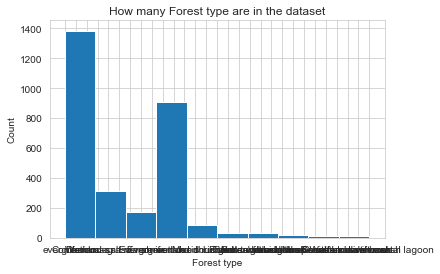

In [67]:
# Forest Type
plt.hist(ffile["Forest type"])
plt.xlabel("Forest type")
plt.ylabel("Count")
plt.title("How many Forest type are in the dataset")
plt.show()

In [69]:
plt.hist(ffile["10m_average temperature"])
plt.xlabel("10m_average temperature")
plt.ylabel("Count")
plt.title("Levels of tempreture in the dataset")
plt.show()

KeyError: '10m_average temperature'

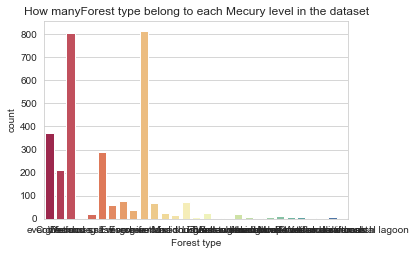

In [70]:
# Forest Type
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.title("How manyForest type belong to each Mecury level in the dataset")
sns.countplot(x="Forest type", data=ffile, palette='Spectral');


In [66]:
ffile['Forest type'].value_counts()

coniferous                                        815
Decidous                                          804
evergreen                                         370
grass                                             289
Coniferous                                        210
Evergreen                                          75
shrub                                              72
wetland                                            68
/                                                  61
Evergreen                                          36
Mixed                                              24
Tundra                                             24
Wetland-salt marsh                                 20
Wetland-mangrove                                   20
decidous                                           15
deciduous &coniferous                              11
grassland                                           9
wetland-salt marsh                                  8
Lichen                      

In [31]:
ffile.shape

(2979, 352)

In [39]:

# Let's See Output
ffile['Hg_con_PPB'].value_counts()

30.0     51
20.0     48
40.0     47
60.0     34
2.0      30
         ..
377.0     1
23.4      1
8.7       1
60.4      1
18.9      1
Name: Hg_con_PPB, Length: 932, dtype: int64

### Correlation

In [34]:
ffile.corr()

,fid,Hg_con_PPB,Latitude,Longitude,AGB_ha_1,AGB_ha_2,AGB_ha_3,AGB_ha_4,AGB_ha_5,AGB_ha_6,...,Hg_comb_power_ind_2012.0.1degx0.1deg,Hg_comb_res_oth_2012.0.1degx0.1deg,Hg_glass_2012.0.1degx0.1deg,Hg_gold_A_2012.0.1degx0.1deg,Hg_gold_L_2012.0.1degx0.1deg,Hg_Iro_2012.0.1degx0.1deg,Hg_nfe_oth_2012.0.1degx0.1deg,Hg_shipping_2012.0.1degx0.1deg,Hg_tro_2012.0.1degx0.1deg,Hg_waste_2012.0.1degx0.1deg
fid,1.000000,0.014289,0.262666,-0.346101,-0.167862,-0.157092,0.016462,0.125076,0.132642,0.093890,...,0.028630,0.006336,0.018464,-0.002969,0.032001,0.025040,-0.000323,-0.035688,0.105230,-0.052640
Hg_con_PPB,0.014289,1.000000,-0.038682,0.040476,-0.127105,-0.140998,-0.163454,-0.170927,-0.159711,-0.155602,...,-0.023706,-0.029387,-0.024939,0.009295,0.002019,-0.005009,-0.004176,-0.032997,-0.046149,-0.012444
Latitude,0.262666,-0.038682,1.000000,-0.108642,-0.072979,-0.047843,0.062385,0.144118,0.152854,0.167893,...,-0.038699,-0.046824,0.031306,-0.027762,-0.021614,0.010760,-0.006374,0.065600,-0.052387,-0.097918
Longitude,-0.346101,0.040476,-0.108642,1.000000,0.095582,0.110574,-0.101254,-0.219918,-0.225493,-0.191674,...,0.122758,0.140116,0.072873,0.010268,-0.026641,0.001665,0.037534,0.046982,0.048062,0.136411
AGB_ha_1,-0.167862,-0.127105,-0.072979,0.095582,1.000000,0.986529,0.929167,0.844617,0.803274,0.806627,...,-0.013162,0.021218,0.089081,-0.015337,-0.021075,0.024718,-0.019955,-0.031679,-0.150667,-0.010037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Hg_Iro_2012.0.1degx0.1deg,0.025040,-0.005009,0.010760,0.001665,0.024718,0.028701,0.039450,0.046404,0.053113,0.053381,...,0.038225,-0.002695,0.061725,-0.000648,-0.001242,1.000000,-0.000683,-0.004448,0.027793,-0.000592
Hg_nfe_oth_2012.0.1degx0.1deg,-0.000323,-0.004176,-0.006374,0.037534,-0.019955,-0.020336,-0.026597,-0.029968,-0.031749,-0.025941,...,0.006803,0.044176,-0.002927,0.392459,0.474732,-0.000683,1.000000,-0.004519,0.026478,-0.003093
Hg_shipping_2012.0.1degx0.1deg,-0.035688,-0.032997,0.065600,0.046982,-0.031679,-0.033475,-0.027872,-0.019077,-0.020986,-0.028111,...,-0.001473,-0.013418,-0.007192,-0.004287,-0.008221,-0.004448,-0.004519,1.000000,0.003835,-0.010033
Hg_tro_2012.0.1degx0.1deg,0.105230,-0.046149,-0.052387,0.048062,-0.150667,-0.174070,-0.161333,-0.146704,-0.138513,-0.116910,...,0.238628,0.335881,0.151845,-0.007361,-0.010647,0.027793,0.026478,0.003835,1.000000,0.164369


<AxesSubplot:>

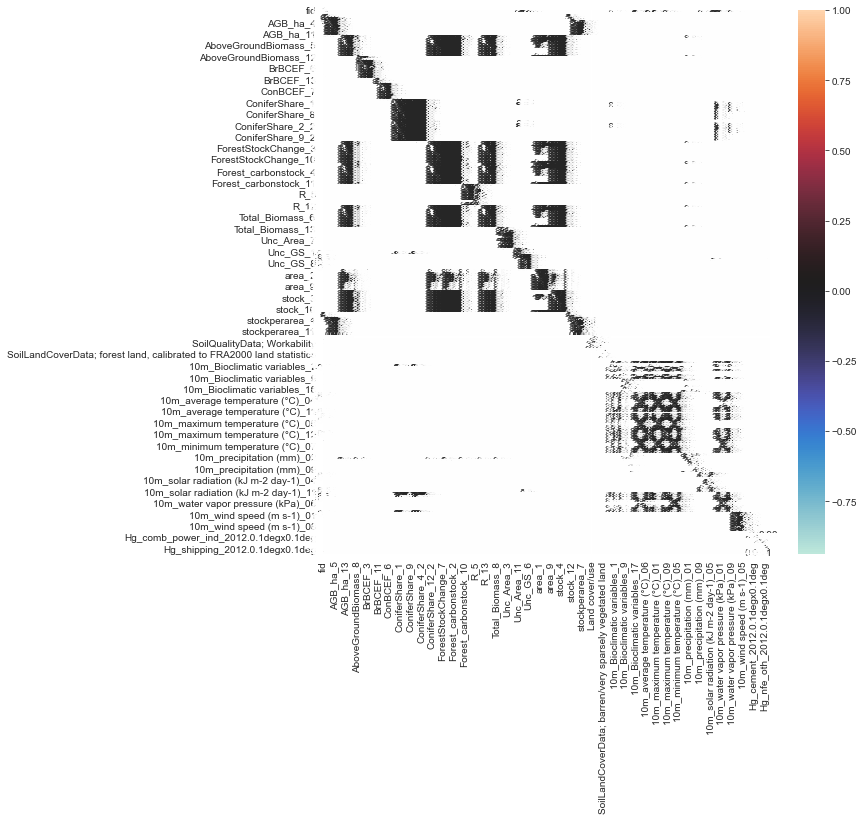

In [36]:
plt.figure(figsize=(10,10))
matrix=np.triu(ffile.corr())
sns.heatmap(ffile.corr(), annot=True,cmap="icefire")

In [37]:
ffile.columns

Index(['wkt_geom', 'fid', 'Reference', 'Hg_con_PPB', 'STD', 'Tissue',
       'Species', 'Location type', 'Location name', 'Country',
       ...
       'Hg_comb_power_ind_2012.0.1degx0.1deg',
       'Hg_comb_res_oth_2012.0.1degx0.1deg', 'Hg_glass_2012.0.1degx0.1deg',
       'Hg_gold_A_2012.0.1degx0.1deg', 'Hg_gold_L_2012.0.1degx0.1deg',
       'Hg_Iro_2012.0.1degx0.1deg', 'Hg_nfe_oth_2012.0.1degx0.1deg',
       'Hg_shipping_2012.0.1degx0.1deg', 'Hg_tro_2012.0.1degx0.1deg',
       'Hg_waste_2012.0.1degx0.1deg'],
      dtype='object', length=352)

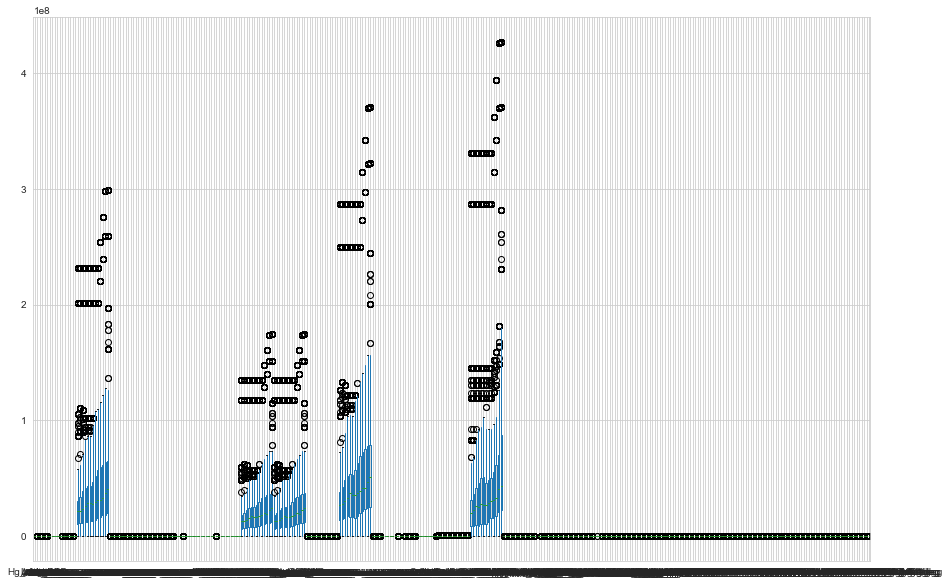

In [38]:
plt.figure(figsize =(15, 10))
ffile.boxplot()
plt.show()

In [172]:
px.box(ffile,x = "ChestPainType", y = "Age")


In [173]:
px.box(ffile,x = "Age", y = "RestingBP")

In [174]:
px.box(ffile,x = "Sex", y = "RestingBP")

## Data Preprocessing

In [57]:
X = ffile.drop(columns=['Hg_con_PPB'])
Y = ffile['Hg_con_PPB']


In [58]:
from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
f
# X['forestype'] = le.fit_transform(X['Forest type'])
# X['temp'] = le.fit_transform(X['10m_average temperature'])
# X['prescipation'] = le.fit_transform(X['10m_precipitation'])
# X['landcover'] = le.fit_transform(X['10m_wind speed (m s-1)_0'])

In [59]:
X.head()

,wkt_geom,fid,Reference,STD,Tissue,Species,Location type,Location name,Country,Latitude,Longitude,altitude (m),Reference_1,Forest type,Sample Size,Determination method,Study period,figure and table,Location type_1,GEM/TGM,RGM,PBM,reference_2,AGB_ha_1,AGB_ha_2,AGB_ha_3,AGB_ha_4,AGB_ha_5,AGB_ha_6,AGB_ha_7,AGB_ha_8,AGB_ha_9,AGB_ha_10,AGB_ha_11,AGB_ha_12,AGB_ha_13,AboveGroundBiomass_1,AboveGroundBiomass_2,AboveGroundBiomass_3,AboveGroundBiomass_4,AboveGroundBiomass_5,AboveGroundBiomass_6,AboveGroundBiomass_7,AboveGroundBiomass_8,AboveGroundBiomass_9,AboveGroundBiomass_10,AboveGroundBiomass_11,AboveGroundBiomass_12,AboveGroundBiomass_13,BrBCEF_1,BrBCEF_2,BrBCEF_3,BrBCEF_4,BrBCEF_5,BrBCEF_6,BrBCEF_7,BrBCEF_8,BrBCEF_9,BrBCEF_10,BrBCEF_11,BrBCEF_12,BrBCEF_13,ConBCEF_1,ConBCEF_2,ConBCEF_3,ConBCEF_4,ConBCEF_5,ConBCEF_6,ConBCEF_7,ConBCEF_8,ConBCEF_9,ConBCEF_10,ConBCEF_11,ConBCEF_12,ConBCEF_13,ConiferShare_1,ConiferShare_2,ConiferShare_3,ConiferShare_4,ConiferShare_5,ConiferShare_6,ConiferShare_7,ConiferShare_8,ConiferShare_9,ConiferShare_10,ConiferShare_11,ConiferShare_12,ConiferShare_13,ConiferShare_1_2,ConiferShare_2_2,ConiferShare_3_2,ConiferShare_4_2,ConiferShare_5_2,ConiferShare_6_2,ConiferShare_7_2,ConiferShare_8_2,ConiferShare_9_2,ConiferShare_10_2,ConiferShare_11_2,ConiferShare_12_2,ConiferShare_13_2,ForestStockChange_1,ForestStockChange_2,ForestStockChange_3,ForestStockChange_4,ForestStockChange_5,ForestStockChange_6,ForestStockChange_7,ForestStockChange_8,ForestStockChange_9,ForestStockChange_10,ForestStockChange_11,ForestStockChange_12,ForestStockChange_13,Forest_carbonstock_1,Forest_carbonstock_2,Forest_carbonstock_3,Forest_carbonstock_4,Forest_carbonstock_5,Forest_carbonstock_6,Forest_carbonstock_7,Forest_carbonstock_8,Forest_carbonstock_9,Forest_carbonstock_10,Forest_carbonstock_11,Forest_carbonstock_12,Forest_carbonstock_13,R_1,R_2,R_3,R_4,R_5,R_6,R_7,R_8,R_9,R_10,R_11,R_12,R_13,Total_Biomass_1,Total_Biomass_2,Total_Biomass_3,Total_Biomass_4,Total_Biomass_5,Total_Biomass_6,Total_Biomass_7,Total_Biomass_8,Total_Biomass_9,Total_Biomass_10,Total_Biomass_11,Total_Biomass_12,Total_Biomass_13,Unc_Area_1,Unc_Area_2,Unc_Area_3,Unc_Area_4,Unc_Area_5,Unc_Area_6,Unc_Area_7,Unc_Area_8,Unc_Area_9,Unc_Area_10,Unc_Area_11,Unc_Area_12,Unc_Area_13,Unc_GS_1,Unc_GS_2,Unc_GS_3,Unc_GS_4,Unc_GS_5,Unc_GS_6,Unc_GS_7,Unc_GS_8,Unc_GS_9,Unc_GS_10,Unc_GS_11,Unc_GS_12,Unc_GS_13,area_1,area_2,area_3,area_4,area_5,area_6,area_7,area_8,area_9,area_10,area_11,area_12,area_13,stock_1,stock_2,stock_3,stock_4,stock_5,stock_6,stock_7,stock_8,stock_9,stock_10,stock_11,stock_12,stock_13,stockperarea_1,stockperarea_2,stockperarea_3,stockperarea_4,stockperarea_5,stockperarea_6,stockperarea_7,stockperarea_8,stockperarea_9,stockperarea_10,stockperarea_11,stockperarea_12,stockperarea_13,time_bnds_1,Land cover/use,SoilQualityData; Nutrient availability,SoilQualityData; Excess salts,SoilQualityData; Workability,SoilQualityData; Toxicity,SoilQualityData; Rooting contitions,SoilQualityData; Oxygen availability to roots,SoilQualityData; Nutrient retention capacity,SoilLandCoverData; barren/very sparsely vegetated land,SoilLandCoverData; grass/scrub/woodland,"SoilLandCoverData; forest land, calibrated to FRA2000 land statistics",SoilLandCoverData; rain-fed cultivated land,"SoilLandCoverData; irrigated cultivated land, according to GMIA 4.0",SoilLandCoverData; total cultivated land,SoilLandCoverData; mapped water bodies,SoilLandCoverData; built-up land (residential and infrastructure),10m_Bioclimatic variables_1,10m_Bioclimatic variables_2,10m_Bioclimatic variables_3,10m_Bioclimatic variables_4,10m_Bioclimatic variables_5,10m_Bioclimatic variables_6,10m_Bioclimatic variables_7,10m_Bioclimatic variables_8,10m_Bioclimatic variables_9,10m_Bioclimatic variables_10,10m_Bioclimatic variables_11,10m_Bioclimatic variables_12,10m_Bioclimatic variables_13,10m_Bioclimatic variables_14,10m_Bioclimatic variables_15,10m_Bioclimatic variables_16,10m_Bioclimatic variables_17,10m_Bioclimat

In [60]:
#Remove outliers in RestingBP,Cholesterol

# index_to_drop = list(ffile.loc[(ffile.RestingBP == 0) | (ffile.Cholesterol == 0)].index)
    
# heart_df.drop(index_to_drop, inplace=True)
# heart_df.describe()

In [61]:
len(ffile)

2979

### Split Train and Test Data

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,stratify=Y,random_state=20)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [141]:
print("X Train Shape :",X_train.shape)
print("y Train Shape :",Y_train.shape)
print("X Test Shape :",X_test.shape)
print("y Test Shape :",Y_test.shape)

X Train Shape : (615, 11)
y Train Shape : (615,)
X Test Shape : (303, 11)
y Test Shape : (303,)


In [142]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Model Training

In [143]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [144]:
tree_model = DecisionTreeClassifier(criterion='entropy',max_depth=4)
svm_model = SVC(kernel='linear',probability=True)
rf_model = RandomForestClassifier(criterion='entropy',max_depth=4,n_estimators=25)
lr_model = LogisticRegression()

In [145]:
#Decision Tree classifier
tree_model.fit(X_train,Y_train)
tree_proba = tree_model.predict_proba(X_test)[:,1]
tree_predict = tree_model.predict(X_test)
treetrain_predict = tree_model.predict(X_train)

#SVM Classifier
svm_model.fit(X_train,Y_train)
svm_proba = svm_model.predict_proba(X_test)[:,1]
svm_predict = svm_model.predict(X_test)
svmtrain_predict = svm_model.predict(X_train)

# Random-Forest Classifier
rf_model.fit(X_train,Y_train)
rf_proba = rf_model.predict_proba(X_test)[:,1]
rf_predict = rf_model.predict(X_test)
rftrain_predict = rf_model.predict(X_train)

# Logistic Regression
lr_model.fit(X_train,Y_train)
lr_proba = lr_model.predict_proba(X_test)[:,1]
lr_predict = lr_model.predict(X_test)
lrtrain_predict = lr_model.predict(X_train)

### Model Evaluation

In [146]:
from sklearn.metrics import confusion_matrix, accuracy_score,roc_auc_score, precision_score, recall_score, accuracy_score, classification_report


In [147]:
#Accuracy on testin data
score = accuracy_score(Y_test,tree_predict)
print("TreeScore :",round(score*100,2))

score = accuracy_score(Y_test,svm_predict)
print("SVMScore :",round(score*100,2))

score = accuracy_score(Y_test,rf_predict)
print("RandomForestScore :",round(score*100,2))

score = accuracy_score(Y_test,lr_predict)
print("LogisticRegressionScore :",round(score*100,2))

TreeScore : 81.19
SVMScore : 85.15
RandomForestScore : 86.14
LogisticRegressionScore : 84.16


<AxesSubplot:xlabel='algorithms', ylabel='Scores'>

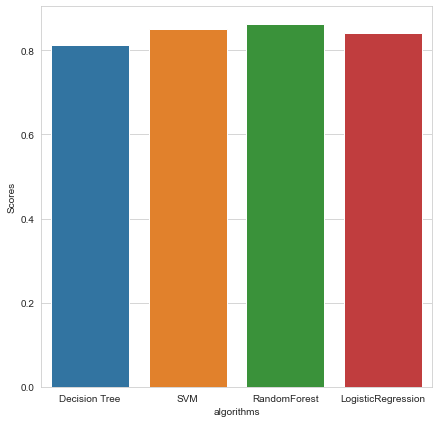

In [148]:
scores = pd.DataFrame(
    { "algorithms": ['Decision Tree','SVM', 'RandomForest','LogisticRegression'],
    "Scores": [accuracy_score(Y_test, tree_predict),
               accuracy_score(Y_test, svm_predict),
               accuracy_score(Y_test, rf_predict),
               accuracy_score(Y_test, lr_predict),] }
)
plt.figure(figsize=(7,7))
sns.barplot(x='algorithms', y='Scores', data=scores)

In [149]:
#Accuracy on training data
score_tree = accuracy_score(Y_train,treetrain_predict)
print("Score :",round(score_tree*100,2))

score_SVM = accuracy_score(Y_train,svmtrain_predict)
print("Score :",round(score_SVM*100,2))

score_RF = accuracy_score(Y_train,rftrain_predict)
print("Score :",round(score_RF*100,2))

score_LR = accuracy_score(Y_train,lrtrain_predict)
print("Score :",round(score_LR*100,2))

Score : 87.15
Score : 86.34
Score : 89.43
Score : 85.85


In [150]:
print('Classification Reports\n')
print(f'Decision Tree -------------------\n{classification_report(Y_test, tree_predict)}\n')
print(f'SVM -------------------\n{classification_report(Y_test, svm_predict)}\n')
print(f'Random Forest -------------------\n{classification_report(Y_test, rf_predict)}\n')
print(f'Logistic Regression -------------------\n{classification_report(Y_test, lr_predict)}\n')

Classification Reports

Decision Tree -------------------
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       135
           1       0.85      0.80      0.82       168

    accuracy                           0.81       303
   macro avg       0.81      0.81      0.81       303
weighted avg       0.82      0.81      0.81       303


SVM -------------------
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       135
           1       0.86      0.87      0.87       168

    accuracy                           0.85       303
   macro avg       0.85      0.85      0.85       303
weighted avg       0.85      0.85      0.85       303


Random Forest -------------------
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       135
           1       0.87      0.88      0.88       168

    accuracy                           0.86       303
   macro a

# Cross Validation

In [193]:
#Ignore this part, this is in progress I am trying to do cross validation to evaluate the models

from sklearn.model_selection import KFold,cross_validate,cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

## Decision Tree Classifier

### Leave one out

In [194]:
dt = DecisionTreeClassifier()
loocv = LeaveOneOut()

In [195]:
loocv_score = cross_val_score(dt,X,Y,cv=loocv)

In [196]:
loocv_score_mean = loocv_score.mean()
print("The average accuracy of Leave one out method with is",loocv_score_mean)

The average accuracy of Leave one out method with is 0.8017429193899782


### K-Fold Method

In [197]:
kf= KFold(n_splits=10)
kfold_score = cross_val_score(dt,X,Y,cv=kf)
print("The cross validation scores of k-fold method with 5 folds is",kfold_score)

The cross validation scores of k-fold method with 5 folds is [0.79347826 0.80434783 0.90217391 0.72826087 0.80434783 0.80434783
 0.83695652 0.69565217 0.74725275 0.72527473]


In [198]:
kfold_score_mean = kfold_score.mean()

In [199]:
print("The min accuracy from k-fold CV is",min(kfold_score))
print("The max accuracy from k-fold CV is", max(kfold_score))
print("The mean cross validation scores of k-fold method with 10 folds is",kfold_score_mean)

The min accuracy from k-fold CV is 0.6956521739130435
The max accuracy from k-fold CV is 0.9021739130434783
The mean cross validation scores of k-fold method with 10 folds is 0.7842092689918777


### Stratified K-Fold method

In [200]:
skfold = StratifiedKFold(n_splits=10)

In [201]:
skfold_score = cross_val_score(dt,X,Y,cv=skfold)

In [202]:
print("The accuracy of Stratified k-fold method with 10 folds is",skfold_score)

The accuracy of Stratified k-fold method with 10 folds is [0.79347826 0.82608696 0.7826087  0.82608696 0.83695652 0.80434783
 0.79347826 0.76086957 0.69230769 0.73626374]


In [203]:
skfold_score_mean = skfold_score.mean()
print("The accuracy of Stratifieid k-fold method with 10 folds is",skfold_score_mean)

The accuracy of Stratifieid k-fold method with 10 folds is 0.785248447204969


## Random Forest

In [223]:
def get_score(n_estimators):
    my_pipeline = Pipeline(steps=[
      ('preprocessor', SimpleImputer()),
        ('model', RandomForestRegressor(n_estimators, random_state=0))
    ])
    scores = -1 * cross_val_score(my_pipeline,X,Y,
                                 cv=3,
                                 scoring='neg_mean_absolute_error')
   
    return scores.mean()

In [224]:
results = {}
for i in range(1,9):
    results[50*i] =  get_score(50*i)

In [225]:
print("MAE scores:\n", results.values())

MAE scores:
 dict_values([0.2584095860566449, 0.2559694989106754, 0.2549673202614379, 0.2555119825708061, 0.25622222222222224, 0.25578068264342774, 0.2549579831932773, 0.2555501089324619])


In [226]:
print("number of trees", results.keys())

number of trees dict_keys([50, 100, 150, 200, 250, 300, 350, 400])


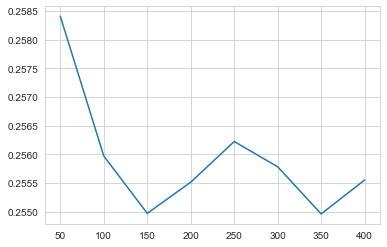

In [227]:
plt.plot(list(results.keys()), list(results.values()))
plt.show()

In [97]:
cv = KFold(n_splits =10, shuffle=True)

cv_results = cross_validate(svm_model,X, Y, cv=cv, return_train_score=False)

cv_mean = cv_results['test_score'].mean()
cv_std = cv_results['test_score'].std()

print('')
print('Accuracy mean SVM:',round(cv_mean,2))
print('')
print('Accuracy interval SVM:',round(cv_mean-2*cv_std,2),round(cv_mean+2*cv_std,2))
print('')



Accuracy mean SVM: 0.86

Accuracy interval SVM: 0.8 0.92



In [100]:
cv = KFold(n_splits =10, shuffle=True)

cv_results = cross_validate(tree_model,X, Y, cv=cv, return_train_score=False)

cv_mean = cv_results['test_score'].mean()
cv_std = cv_results['test_score'].std()

print('')
print('Accuracy mean Decision Tree:',round(cv_mean,2))
print('')
print('Accuracy interval Decision Tree:',round(cv_mean-2*cv_std,2),round(cv_mean+2*cv_std,2))
print('')



Accuracy mean Decision Tree: 0.83

Accuracy interval Decision Tree: 0.76 0.9



In [99]:
cv = KFold(n_splits =10, shuffle=True)

cv_results = cross_validate(rf_model,X, Y, cv=cv, return_train_score=False)

cv_mean = cv_results['test_score'].mean()
cv_std = cv_results['test_score'].std()

print('')
print('Accuracy mean Random Forest:',round(cv_mean,2))
print('')
print('Accuracy interval Random Forest:',round(cv_mean-2*cv_std,2),round(cv_mean+2*cv_std,2))
print('')


Accuracy mean Random Forest: 0.86

Accuracy interval Random Forest: 0.8 0.92

